In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load rainfall time series data
# Make sure your file has 'Rainfall_mm' column and the correct delimiter
df = pd.read_csv('/content/dummy-rainfall-data.csv')
print(df.columns)  # Should show ['Date', 'Rainfall_mm']

data = df['Rainfall_mm'].values


# Step 2: Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Step 3: Create input-output sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 20
X, y = create_sequences(data_scaled, window_size)

# Reshape X to 3D for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Step 5: Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Step 7: Predict and inverse transform
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)



Index(['Date', 'Rainfall_mm'], dtype='object')
X_train shape: (128, 20, 1)
X_test shape: (32, 20, 1)
y_train shape: (128, 1)
y_test shape: (32, 1)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.2497 - val_loss: 0.1403
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1189 - val_loss: 0.1091
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1011 - val_loss: 0.1049
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0956 - val_loss: 0.1133
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0937 - val_loss: 0.1023
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0832 - val_loss: 0.0913
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0843 - val_loss: 0.0882
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0826 - val_loss: 0.0859
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0846 - val_loss: 0.0801
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0671 - val_loss: 0.0754
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0725 - val_loss: 0.0700
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0657 - val_loss: 0.0605
Epoch 13/50


In [18]:
# prompt: print rmsr loss score and accuracy

import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt

# Calculate RSME
rmse = sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"RSME: {rmse}")

# Accuracy (Note: Accuracy is not a standard metric for regression problems like this.
# We can define a custom accuracy if needed, e.g., percentage of predictions within a certain tolerance).
# For demonstration, let's define accuracy as predictions within 0.5 of the actual value.
tolerance = 10
correct_predictions = np.sum(np.abs(y_test_actual - y_pred) <= tolerance)
total_predictions = len(y_test_actual)
custom_accuracy = correct_predictions / total_predictions
print(f"Custom Accuracy (within {tolerance}mm): {custom_accuracy}")

RSME: 6.82240624025848
Custom Accuracy (within 10mm): 0.875


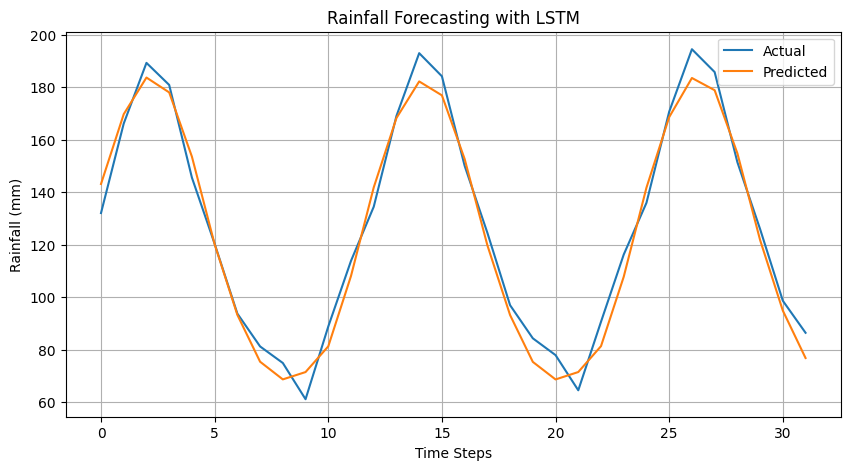

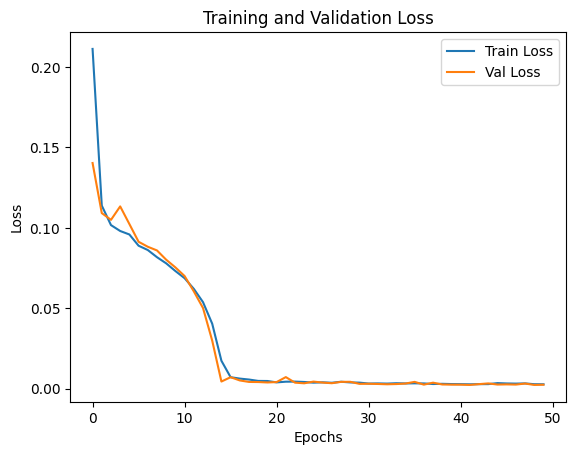

In [3]:
# Step 8: Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Rainfall Forecasting with LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.savefig("rainfall_forecasting.png")
plt.show()

# Step 9: Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("training_loss.png")
plt.show()